In [1]:
pip install numpy pandas sckit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python314\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sckit-learn


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt 

In [3]:
df =pd.read_csv(r'C:\Users\Lenovo\Downloads\train (1).csv')

In [4]:
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [5]:
"""here i am trying to find best coorelation head with value more than .25"""
import seaborn as sns
corr=df.select_dtypes(include='number').corr()['SalePrice'].sort_values(ascending=False)
good_corr=(corr>.25)
print(good_corr.index.tolist())

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


In [6]:
"""i used that output in data preparation"""
dx=df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd','YearBuilt','YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch','KitchenAbvGr']]
cleaned_dx=dx.dropna().copy()
x=cleaned_dx[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']]
y=cleaned_dx['SalePrice']
print(x)
print(y)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               7       1710           2         548          856       856   
1               6       1262           2         460         1262      1262   
2               7       1786           2         608          920       920   
3               7       1717           3         642          756       961   
4               8       2198           3         836         1145      1145   
...           ...        ...         ...         ...          ...       ...   
1455            6       1647           2         460          953       953   
1456            6       2073           2         500         1542      2073   
1457            7       2340           1         252         1152      1188   
1458            5       1078           1         240         1078      1078   
1459            5       1256           1         276         1256      1256   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"training data:{x_train.shape},{y_train.shape}")
print(f"testing data:{x_test.shape},{y_test.shape}")

training data:(896, 37),(896,)
testing data:(225, 37),(225,)


In [8]:
model=LinearRegression()
model.fit(x_train,y_train)
print(f"intercept:{model.intercept_}")
print(f"coefficient:{model.coef_[0]}")

intercept:-481325.75930213404
coefficient:19559.892635834938


In [9]:
y_pred=model.predict(x_test)
print(f"predicted price={y_pred}")
print(f"actual price={y_test.values}")

predicted price=[148466.73735176 159786.98086961 109511.9522256  140467.33298007
 156946.21842029 264841.65736779 160745.6240717  159917.22426891
 224357.65108105 133094.76404507 188806.08331731 315328.81825748
 235486.72698734 171695.77700982 115866.3367055  123846.49228419
 181596.30383212 204554.43954138 202000.12543422 193668.22068031
 223422.6388147  123455.60380002  98360.59192012 221872.5186163
 142718.27902777 109994.93009009 468204.92864887 131907.9239957
 170327.58414636 141524.50914394 207845.3656481  235988.0447999
 199683.19500663 279222.35626885 310639.09772332 216209.57117716
 195336.17332603 159347.79426851 187864.86781177  83670.96149537
 178207.11592967 258042.09644627 123314.70888983 107117.07201018
 287068.50218719 238270.45064584 125256.60444688 199141.92571281
 150381.93092124 179377.97438471 200470.81280217 263166.12684135
 171330.94004296 181420.09560547 216489.94371562 243454.74225518
 159651.81003386 178004.14313928 207731.37605326  73638.17962822
 204367.0784

In [10]:
"""got satisfactory r2"""
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"mean square error:{mse}")
print(f"r2:{r2}")



mean square error:1591724600.5772493
r2:0.7981919836405169


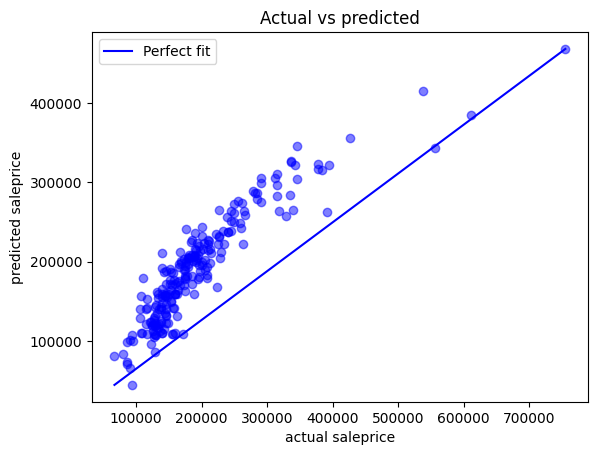

In [11]:
"""plotted model outcome vs test value"""
plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_pred.min(),y_pred.max()],color='blue',label='Perfect fit')
plt.xlabel('actual saleprice')
plt.ylabel('predicted saleprice')
plt.title('Actual vs predicted')
plt.legend()
plt.show()

In [19]:
test_df=pd.read_csv(r'C:\Users\Lenovo\Downloads\test_houseprediction.csv')
print(test_df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolAre

In [27]:
'''take out only relevant features that i decided earlier from test samples'''
features=test_df[[ 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']]
print(features)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               5        896         1.0       730.0        882.0       896   
1               6       1329         1.0       312.0       1329.0      1329   
2               5       1629         2.0       482.0        928.0       928   
3               6       1604         2.0       470.0        926.0       926   
4               8       1280         2.0       506.0       1280.0      1280   
...           ...        ...         ...         ...          ...       ...   
1454            4       1092         0.0         0.0        546.0       546   
1455            4       1092         1.0       286.0        546.0       546   
1456            5       1224         2.0       576.0       1224.0      1224   
1457            5        970         0.0         0.0        912.0       970   
1458            7       2000         3.0       650.0        996.0       996   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [31]:
"""fill any possiible nan with 0"""
x_test=features.fillna(0)
print(x_test)


      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               5        896         1.0       730.0        882.0       896   
1               6       1329         1.0       312.0       1329.0      1329   
2               5       1629         2.0       482.0        928.0       928   
3               6       1604         2.0       470.0        926.0       926   
4               8       1280         2.0       506.0       1280.0      1280   
...           ...        ...         ...         ...          ...       ...   
1454            4       1092         0.0         0.0        546.0       546   
1455            4       1092         1.0       286.0        546.0       546   
1456            5       1224         2.0       576.0       1224.0      1224   
1457            5        970         0.0         0.0        912.0       970   
1458            7       2000         3.0       650.0        996.0       996   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [32]:
"""carried out prediction test sample"""
prediction=model.predict(x_test)

In [37]:
"""create dataframe to submit predicted sales price"""
submission=pd.DataFrame({id:test_df['Id'],'SalePrice':prediction})

In [39]:
"""submission.csvis formed in my folder"""
submission.to_csv('submission.csv',index=False)
print(submission)

      <built-in function id>      SalePrice
0                       1461  118811.875474
1                       1462  103590.332247
2                       1463  167656.935322
3                       1464  196173.299657
4                       1465  198020.444917
...                      ...            ...
1454                    2915   62817.041898
1455                    2916   51070.209304
1456                    2917  166065.705684
1457                    2918  101699.325002
1458                    2919  251824.715615

[1459 rows x 2 columns]
